In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from imblearn.over_sampling import SMOTE

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from my_functions import *

<h1>Bank Credit Card Customers - Churn Modeling</h1>

<h3>Bank<sup>1</sup></h3>
<img src="data/bank-logo.jpg" alt="Bank Image" style="width:400px;height:300px;" align="right">
<p>The concept of banking may have begun in ancient Assyria and Babylonia with merchants offering loans of grain as collateral within a barter system. Lenders in ancient Greece and during the Roman Empire added two important innovations: they accepted deposits and changed money. Archaeology from this period in ancient China and India also shows evidence of money lending.

The word bank was taken into Middle English from Middle French banque, from Old Italian banca, meaning "table", from Old High German banc, bank "bench, counter". Benches were used as makeshift desks or exchange counters during the Renaissance by Florentine bankers, who used to make their transactions atop desks covered by green tablecloths.
    
The definition of a bank varies from country to country. 
Under English common law, a banker is defined as a person who carries on the business of banking by conducting current accounts for their customers, paying cheques drawn on them and also collecting cheques for their customers.

In most common law jurisdictions there is a Bills of Exchange Act that codifies the law in relation to negotiable instruments, including cheques, and this Act contains a statutory definition of the term banker: banker includes a body of persons, whether incorporated or not, who carry on the business of banking. Although this definition seems circular, it is actually functional, because it ensures that the legal basis for bank transactions such as cheques does not depend on how the bank is structured or regulated.

The business of banking is in many common law countries not defined by statute but by common law, the definition above. In other English common law jurisdictions there are statutory definitions of the business of banking or banking business. When looking at these definitions it is important to keep in mind that they are defining the business of banking for the purposes of the legislation, and not necessarily in general. In particular, most of the definitions are from legislation that has the purpose of regulating and supervising banks rather than regulating the actual business of banking. However, in many cases the statutory definition closely mirrors the common law one. Examples of statutory definitions:
<ul>
    <li>"banking business" means the business of receiving money on current or deposit account, paying and collecting cheques drawn by or paid in by customers, the making of advances to customers, and includes such other business as the Authority may prescribe for the purposes of this Act; (Banking Act (Singapore)).</li>
    <li>"banking business" means the business of either or both of the following:
        <ol>
            <li>receiving from the general public money on current, deposit, savings or other similar account repayable on demand or within less than [3 months] ... or with a period of call or notice of less than that period;</li>
            <li>paying or collecting cheques drawn by or paid in by customers.</li>
        </ol>
    </li>
</ul>
Since the advent of EFTPOS (Electronic Funds Transfer at Point Of Sale), direct credit, direct debit and internet banking, the cheque has lost its primacy in most banking systems as a payment instrument. This has led legal theorists to suggest that the cheque based definition should be broadened to include financial institutions that conduct current accounts for customers and enable customers to pay and be paid by third parties, even if they do not pay and collect cheques.

Banks act as payment agents by conducting checking or current accounts for customers, paying cheques drawn by customers in the bank, and collecting cheques deposited to customers' current accounts. Banks also enable customer payments via other payment methods such as Automated Clearing House (ACH), Wire transfers or telegraphic transfer, EFTPOS, and automated teller machines (ATMs).

Banks borrow money by accepting funds deposited on current accounts, by accepting term deposits, and by issuing debt securities such as banknotes and bonds. Banks lend money by making advances to customers on current accounts, by making installment loans, and by investing in marketable debt securities and other forms of money lending.

Banks provide different payment services, and a bank account is considered indispensable by most businesses and individuals. Non-banks that provide payment services such as remittance companies are normally not considered as an adequate substitute for a bank account.

Banks can create new money when they make a loan. New loans throughout the banking system generate new deposits elsewhere in the system. The money supply is usually increased by the act of lending, and reduced when loans are repaid faster than new ones are generated. In the United Kingdom between 1997 and 2007, there was an increase in the money supply, largely caused by much more bank lending, which served to push up property prices and increase private debt. The amount of money in the economy as measured by M4 in the UK went from £750 billion to £1700 billion between 1997 and 2007, much of the increase caused by bank lending. If all the banks increase their lending together, then they can expect new deposits to return to them and the amount of money in the economy will increase. Excessive or risky lending can cause borrowers to default, the banks then become more cautious, so there is less lending and therefore less money so that the economy can go from boom to bust as happened in the UK and many other Western economies after 2007.
</p>

<h5>Range of activities</h5>

<p>Activities undertaken by banks include personal banking, corporate banking, investment banking, private banking, transaction banking, insurance, consumer finance, trade finance and other related.</p>

<h5>Channels</h5>

<p>Banks offer many different channels to access their banking and other services:
<ul>
<li>Branch, in-person banking in a retail location.</li>
<li>Automated teller machine banking adjacent to or remote from the bank.</li>
<li>Bank by mail: Most banks accept cheque deposits via mail and use mail to communicate to their customers.</li>
<li>Online banking over the Internet to perform multiple types of transactions.</li>
<li>Mobile banking is using one's mobile phone to conduct banking transactions.</li>
<li>Telephone banking allows customers to conduct transactions over the telephone with an automated attendant, or when requested, with a telephone operator.</li>
<li>Video banking performs banking transactions or professional banking consultations via a remote video and audio connection.</li><li>Video banking can be performed via purpose built banking transaction machines (similar to an Automated teller machine) or via a video conference enabled bank branch clarification.</li>
<li>Relationship manager, mostly for private banking or business banking, who visits customers at their homes or businesses.</li>
<li>Direct Selling Agent, who works for the bank based on a contract, whose main job is to increase the customer base for the bank.</li>
</ul>
</p>

<h3>Credit Card<sup>2</sup></h3>
<img src="data/credit-card.jpg" alt="Bank Image" align="right">

<p>A credit card is a payment card issued to users (cardholders) to enable the cardholder to pay a merchant for goods and services based on the cardholder's accrued debt (i.e., promise to the card issuer to pay them for the amounts plus the other agreed charges). The card issuer (usually a bank or credit union) creates a revolving account and grants a line of credit to the cardholder, from which the cardholder can borrow money for payment to a merchant or as a cash advance. There are two credit card groups: consumer credit cards and business credit cards. Most cards are plastic, but some are metal cards (stainless steel, gold, palladium, titanium) and a few gemstone-encrusted metal cards.

A regular credit card is different from a charge card, which requires the balance to be repaid in full each month or at the end of each statement cycle. In contrast, credit cards allow the consumers to build a continuing balance of debt, subject to interest being charged. A credit card differs from a charge card also in that a credit card typically involves a third-party entity that pays the seller and is reimbursed by the buyer, whereas a charge card simply defers payment by the buyer until a later date.
A credit card also differs from a debit card, which can be used like currency by the owner of the card.
In 2018, there were 1.12 billion credit cards in circulation in the U.S., and 72% of adults had at least one card.</p>

<h5>Usage</h5>
<p>A credit card issuing company, such as a bank or credit union, enters into agreements with merchants for them to accept their credit cards. Merchants often advertise in signage or other company material which cards they accept by displaying acceptance marks generally derived from logos. Alternatively, this may be communicated, for example, via a restaurant's menu or orally, or stating, "We don't take credit cards".

Visa, MasterCard, American Express are card-issuing entities that set transaction terms for merchants, card-issuing banks, and acquiring banks.
The credit card issuer issues a credit card to a customer at the time or after an account has been approved by the credit provider, which need not be the same entity as the card issuer. The cardholders can then use it to make purchases at merchants accepting that card. When a purchase is made, the cardholder agrees to pay the card issuer. The cardholder indicates consent to pay by signing a receipt with a record of the card details and indicating the amount to be paid or by entering a personal identification number (PIN). Also, many merchants now accept verbal authorizations via telephone and electronic authorization using the Internet, known as a card not present transaction (CNP).

Electronic verification systems allow merchants to verify in a few seconds that the card is valid and the cardholder has sufficient credit to cover the purchase, allowing the verification to happen at time of purchase. The verification is performed using a credit card payment terminal or point-of-sale (POS) system with a communications link to the merchant's acquiring bank. Data from the card is obtained from a magnetic stripe or chip on the card; the latter system is called Chip and PIN in the United Kingdom and Ireland, and is implemented as an EMV card.

For card not present transactions where the card is not shown (e.g., e-commerce, mail order, and telephone sales), merchants additionally verify that the customer is in physical possession of the card and is the authorized user by asking for additional information such as the security code printed on the back of the card, date of expiry, and billing address.

Each month, the cardholder is sent a statement indicating the purchases made with the card, any outstanding fees, the total amount owed and the minimum payment due. In the US, after receiving the statement, the cardholder may dispute any charges that he or she thinks are incorrect (see 15 U.S.C. § 1643, which limits cardholder liability for unauthorized use of a credit card to $50). The Fair Credit Billing Act gives details of the U.S. regulations.

Many banks now also offer the option of electronic statements, either in lieu of or in addition to physical statements, which can be viewed at any time by the cardholder via the issuer's online banking website. Notification of the availability of a new statement is generally sent to the cardholder's email address. If the card issuer has chosen to allow it, the cardholder may have other options for payment besides a physical check, such as an electronic transfer of funds from a checking account. Depending on the issuer, the cardholder may also be able to make multiple payments during a single statement period, possibly enabling him or her to utilize the credit limit on the card several times.</p>

<h3>Customer Churn<sup>3</sup></h3>

<img src="data/customer-churn.png" alt="Customer Churn Image">
<p>Banking is one of those traditional industries that has gone through a steady transformation over the decades. Yet, many banks today with a sizeable customer base hoping to gain a competitive edge have not tapped into the vast amounts of data they have, especially in solving one of the most acknowledged problems – customer churn.

While retaining existing customers and thereby increasing their lifetime value is something everyone acknowledges as being important, there is little the banks can do about customer churn when they don’t see it coming in the first place. This is where predicting churn at the right time becomes important, especially when clear customer feedback is absent. Early and accurate churn prediction empowers CRM and customer experience teams to be creative and proactive in their engagement with the customer. In fact, by simply reaching out to the customer early enough, 11% of the churn can be avoided.

But how do you look for signs of churn? Collecting comprehensive feedback about the customer’s experience can be a challenging task. For one, surveys are expensive and infrequent. Moreover, not all customers receive it or care to respond. So where else can you pick up signs of potential customer disengagement? The answer lies in extracting early warning signs from the already existing data. Advanced machine learning (ML) and data science (DS) techniques can learn from past customer behavior and external triggers that led to churn and use this learning to predict the future occurrence of a churn-like event.

From business problem to predictive insights – it is all in the translation.
    
<b>Defining Churn:</b> The key to extracting meaningful predictive insights is in defining the problem statement building blocks as accurately as possible. In the case of customer churn, it starts with defining what is considered as a “churn event”.

In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance. For example, in the case of HNW (High Net-Worth) customers, it is useful to define churn based on the rate of decline of assets over a specified period. There could be an instance where a customer may be highly active in terms of account operations but has effectively pulled out more than 50% of her assets in the last six months.

Another aspect of the business problem is how early do you want the model to predict? A prediction that is too far out may be less accurate. On the other hand, a short prediction horizon may fare better in accuracy, but it could be too late to intervene once the customer has already made her mind up.

Finally, it is crucial to determine if churn has to be defined at a product level (customer likely to disengage with a particular product, like discontinuing a credit card) or at the relationship level (customer likely to disengage with the bank itself). When the data is analyzed at a relationship level, you get a better understanding of the customer’s point of view. For example, excessive withdrawal from one’s savings account could be a down payment for a house or funding for college tuition. Such insights into customer life events are very powerful not only to prevent churn but also to cross-sell complementing products which can further strengthen the relationship.
    
Financial services<sup>4</sup> such as banking and insurance use applications of predictive analytics for churn modeling, because customer retention is an essential part of most financial services' business models. Other sectors have also discovered the power of predictive analytics, including retailing, telecommunications and pay-TV operators. One of the main objectives of modeling customer churn is to determine the causal factors, so that the company can try to prevent the attrition from happening in the future. Some companies want to prevent their good customers from deteriorating (e.g., by falling behind in their payments) and becoming less profitable customers, so they introduced the notion of partial customer churn.

Usually Company, calculates the churn rate as the percentage of customers lost that quarter. From which you can get the below results:
<ol>
    <li>The number of customers lost.</li>
    <li>The value of recurring business lost.</li>
    <li>The percentage of recurring value lost.</li>
</ol>

<b><i>Calculation of Customer Churn Rate:</i></b>

$$ Customer\ Churn\ Rate = \frac {No.\ of\ Customers\ Lost} {Total\ No.\ of\ Customers\ (Period)} x 100 $$

<b><i>If we want to fully calculate the churn rate we can include the partial customer churn:</i></b>

$$ Customer\ Churn\ Rate = \frac {No.\ of\ Cust.\ Lost + No.\ of\ Partial\ Churn\ Customers} {Total\ No.\ of\ Customers\ (Period)} x 100 $$

There are two main reasons to analyze customer churn:
<ol>
    <li>Before you want to find solutions to improve your churn rate you should know what is causing it in the first place.</li>
    <li>If you have implemented a solution to reduce the churn then you should know if its working or not.</li>
   </ol>

When the churn rate increases it will be a negative impact on a business:
<ul>
<li>Cost of acquiring new customers is significantly higher than retention costs.</li>
<li>The rate of selling to an existing customer is at an average 60% higher than selling to a customer who is not familiar with your brand.</li>
<li>Existing customers, when satisfied are an excellent source for brand promotions through the organic spread of “word of mouth”. In other words, they become your brand promoters and recommend your brand to others, thereby increasing your overall customer base without you having to spend more on customer acquisition.</li>
</ul>

We can do the following things in trying to reduce customer churn:
<ul>
<li>Focus your attention on your best customers.</li>
<li>Analyze churn as it occurs.</li>
<li>Show your customers that you care.</li>
<li>Ask your customers the right questions.</li>
<li>Offer more than usual to your loyal customers.</li>
    </ul>
</p>

<p>Let's jump to our business scenario:
    
A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.</p>

In [3]:
# Filtering out the warnings.
warnings.filterwarnings("ignore")

<h3>Read and load data</h3>

In [4]:
# Reading the BankChurners csv file and show first 5 rows.
bank_churn_customers = pd.read_csv("data/BankChurners.csv")
bank_churn_customers.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


<h5>Data Description</h5>

<ol>
    <li>CLIENTNUM - Client number. Unique identifier for the customer holding the account.</li>
<li>Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0.</li>
<li>Customer_Age -Demographic variable - Customer's Age in Years.</li>
<li>Gender - Demographic variable - M=Male, F=Female.</li>
<li>Dependent_count - Demographic variable - Number of dependents.</li>
<li>Education_Level - Demographic variable - Educational Qualification of the account holder (example: high school).</li>
<li>Marital_Status - Demographic variable - Married, Single, Divorced, Unknown.</li>
<li>Income_Category - Demographic variable - Annual Income Category of the account holder.</li>
<li>Card_Category - Product Variable - Type of Card (Blue, Silver, Gold, Platinum).</li>
<li>Months_on_book - Period of relationship with bank.</li>
<li>Total_Relationship_Count-Total no. of products held by the customer.</li>
<li>Months_Inactive_12_mon - No. of months inactive in the last 12 months.</li>
<li>Contacts_Count_12_mon-No. of Contacts in the last 12 months.</li>
<li>Credit_Limit-Credit Limit on the Credit Card.</li>
<li>Total_Revolving_Bal-Total Revolving Balance on the Credit Card.</li>
<li>Avg_Open_To_Buy-Open to Buy Credit Line (Average of last 12 months).</li>
<li>Total_Amt_Chng_Q4_Q1- Open to Buy Credit Line (Average of last 12 months).</li>
<li>Total_Trans_Amt-Total Transaction Amount (Last 12 months).</li>
<li>Total_Trans_Ct- Total Transaction Count (Last 12 months).</li>
<li>Total_Ct_Chng_Q4_Q1-Change in Transaction Count (Q4 over Q1).</li>
<li>Avg_Utilization_Ratio-Average Card Utilization Ratio.</li>
</ol>

In [5]:
# Suggested by the author of the dataset to remove last 2 columns (NAIVE BAYES CLAS…)
# We can remove CLIENTNUM column also since it's reference and for the purpose of the analysis it's not needed.
bank_churn_customers = bank_churn_customers.iloc[:, :-2]
bank_churn_customers = bank_churn_customers.drop(["CLIENTNUM"], axis = 1)
bank_churn_customers.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
# Checking the number of rows and columns in the dataframe.
bank_churn_customers.shape

(10127, 20)

In [7]:
# Check the column-wise info of the bank_churn_customers dataframe. Using this instead of only .dtypes().
# Here warning appear - FutureWarning: null_counts is deprecated. Probably to be hidden using warnings.filterwarnings("ignore").
bank_churn_customers.info(verbose=True, null_counts=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
# Check the summary for the numeric columns for bank_churn_customers.
bank_churn_customers.describe(exclude="object").T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [9]:
# Check the summary for the non-numeric columns for bank_churn_customers.
bank_churn_customers.describe(exclude=["int64", "float64"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [10]:
# Percentage of NAN values in each column. 
# We can see that we don't have NAN's which is very good news for us.
bank_churn_customers.isna().sum().sort_values(ascending = False)

Attrition_Flag              0
Customer_Age                0
Total_Ct_Chng_Q4_Q1         0
Total_Trans_Ct              0
Total_Trans_Amt             0
Total_Amt_Chng_Q4_Q1        0
Avg_Open_To_Buy             0
Total_Revolving_Bal         0
Credit_Limit                0
Contacts_Count_12_mon       0
Months_Inactive_12_mon      0
Total_Relationship_Count    0
Months_on_book              0
Card_Category               0
Income_Category             0
Marital_Status              0
Education_Level             0
Dependent_count             0
Gender                      0
Avg_Utilization_Ratio       0
dtype: int64

In [11]:
# Check if we have duplicated rows. 
# There are none, so again good news.
bank_churn_customers[bank_churn_customers.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


In [12]:
# Modify column names
bank_churn_customers.columns = [
    "attrition_flag", "customer_age", "gender", "dependent_count", "education_level", 
    "marital_status", "income_category", "card_category", "months_on_book", 
    "total_relationship_count", "months_inactive_12_mon", "contacts_count_12_mon", 
    "credit_limit", "total_revolving_bal", "avg_open_to_buy", "total_amt_chng_q4_q1", 
    "total_trans_amt", "total_trans_ct", "total_ct_chng_q4_q1", "avg_utilization_ratio"
]
bank_churn_customers.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<h3>EDA on Categorical Variables</h3>

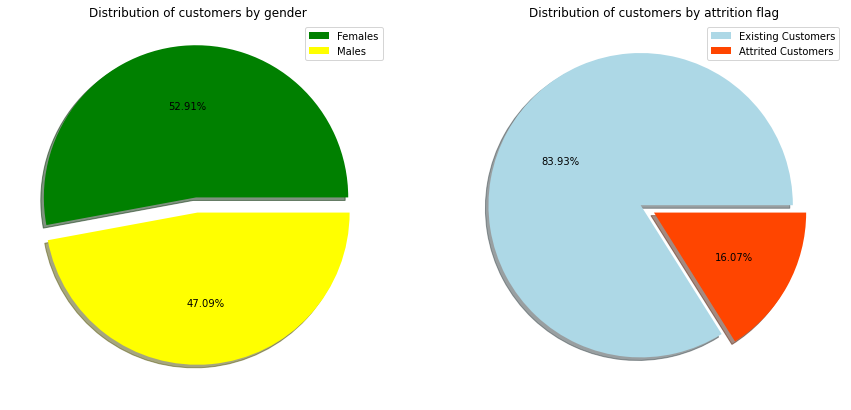

In [13]:
# Plot distribution of applicants by gender and target with 2 pie subplots.
explode = [0.1, 0]
# Gender data
g_data = bank_churn_customers["gender"].value_counts().values
g_labels = ["Females", "Males"]
g_colors = ["green", "yellow"]
g_title = "Distribution of customers by gender"

# Attrition flag data
t_data = bank_churn_customers["attrition_flag"].value_counts().values
t_labels = ["Existing Customers", "Attrited Customers"]
t_colors = ["lightblue", "#FF4500"]
t_title = "Distribution of customers by attrition flag"

plot_two_pie_subplots(g_data, g_labels, g_colors, g_title, t_data, t_labels, t_colors, t_title, explode)

<p>We can see that the attrition flag is very imbalanced. To deal with imbalanced data, we will explore the algorithm SMOTE<sup>5</sup> to upsample the data and get a class balance.</p>

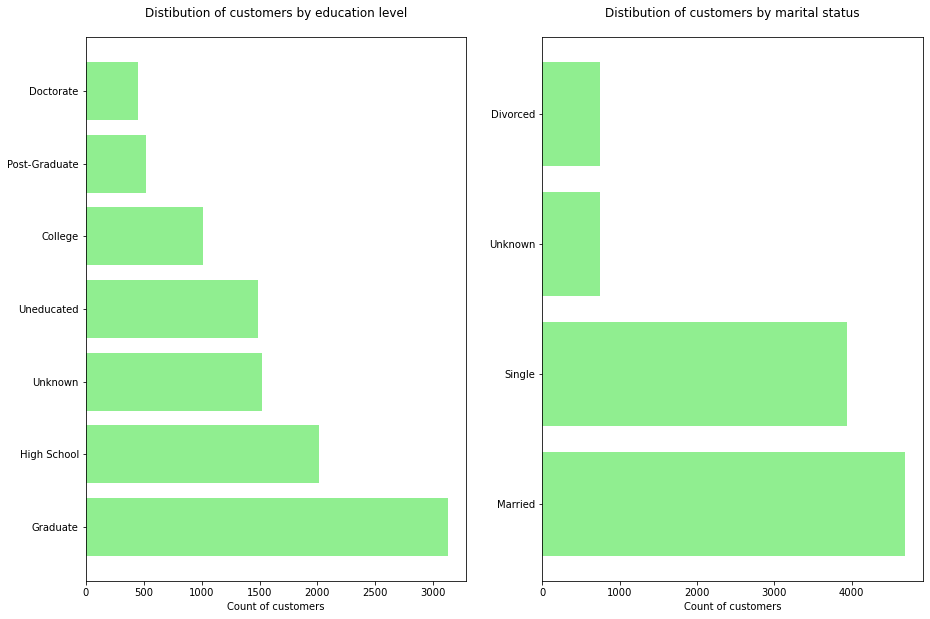

In [14]:
y_data_1 = bank_churn_customers["education_level"].value_counts().keys()
x_data_1 = bank_churn_customers["education_level"].value_counts().values

y_data_2 = bank_churn_customers["marital_status"].value_counts().keys()
x_data_2 = bank_churn_customers["marital_status"].value_counts().values

plot_two_barh_charts(y_data_1, x_data_1, "lightgreen", "Count of customers", "Distibution of customers by education level", 
                    y_data_2, x_data_2, "lightgreen", "Count of customers", "Distibution of customers by marital status")

We can see that most of the clients are graduate and married. Some clients did not state their education level and marital status.

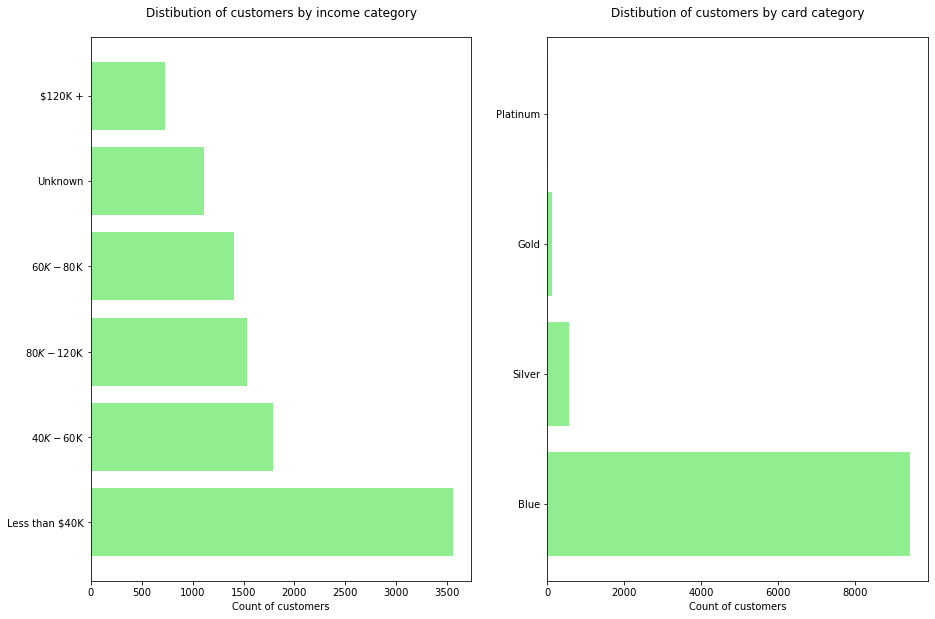

In [15]:
y_data_1 = bank_churn_customers["income_category"].value_counts().keys()
x_data_1 = bank_churn_customers["income_category"].value_counts().values

y_data_2 = bank_churn_customers["card_category"].value_counts().keys()
x_data_2 = bank_churn_customers["card_category"].value_counts().values

plot_two_barh_charts(y_data_1, x_data_1, "lightgreen", "Count of customers", "Distibution of customers by income category", 
                    y_data_2, x_data_2, "lightgreen", "Count of customers", "Distibution of customers by card category")

We can see that the mass of the clients have income less than $40 K and have Blue card category which is the default provided by the bank. Usually in the most banks this are the typical clients with standard cards, one-two accounts, etc.

In [16]:
# Get object columns into a list
object_columns = bank_churn_customers.select_dtypes(exclude=["int64", "float64"]).columns.drop("attrition_flag").to_list()

# Show customer distribution in a table by attrition flag and all other object features (gender, education level, etc.)
for col in object_columns:
    cross = pd.crosstab(bank_churn_customers[col], 
            bank_churn_customers["attrition_flag"], 
            margins = True, 
            margins_name = "% all", 
            normalize="all")
    display(cross)

attrition_flag,Attrited Customer,Existing Customer,% all
gender,,,
F,0.091834,0.437247,0.529081
M,0.068826,0.402093,0.470919
% all,0.160660,0.839340,1.000000


attrition_flag,Attrited Customer,Existing Customer,% all
education_level,,,
College,0.015207,0.084823,0.100030
Doctorate,0.009381,0.035154,0.044534
Graduate,0.048089,0.260788,0.308877
High School,0.030216,0.168559,0.198776
Post-Graduate,0.009085,0.041868,0.050953
Uneducated,0.023403,0.123432,0.146835
Unknown,0.025279,0.124716,0.149995
% all,0.160660,0.839340,1.000000


attrition_flag,Attrited Customer,Existing Customer,% all
marital_status,,,
Divorced,0.011948,0.061914,0.073862
Married,0.070011,0.392811,0.462822
Single,0.065962,0.323393,0.389355
Unknown,0.012738,0.061222,0.073961
% all,0.160660,0.839340,1.000000


attrition_flag,Attrited Customer,Existing Customer,% all
income_category,,,
$120K +,0.012442,0.059346,0.071788
$40K - $60K,0.026760,0.149995,0.176755
$60K - $80K,0.018663,0.119779,0.138442
$80K - $120K,0.023897,0.127678,0.151575
Less than $40K,0.060433,0.291202,0.351634
Unknown,0.018465,0.091340,0.109805
% all,0.160660,0.839340,1.000000


attrition_flag,Attrited Customer,Existing Customer,% all
card_category,,,
Blue,0.149995,0.781772,0.931767
Gold,0.002074,0.009381,0.011455
Platinum,0.000494,0.001481,0.001975
Silver,0.008097,0.046707,0.054804
% all,0.160660,0.839340,1.000000


<p>We'll put our description of the results from the crosstab<sup>6</sup> in the Conclusion section.</p>

<h3>EDA on Numerical Variables</h3>

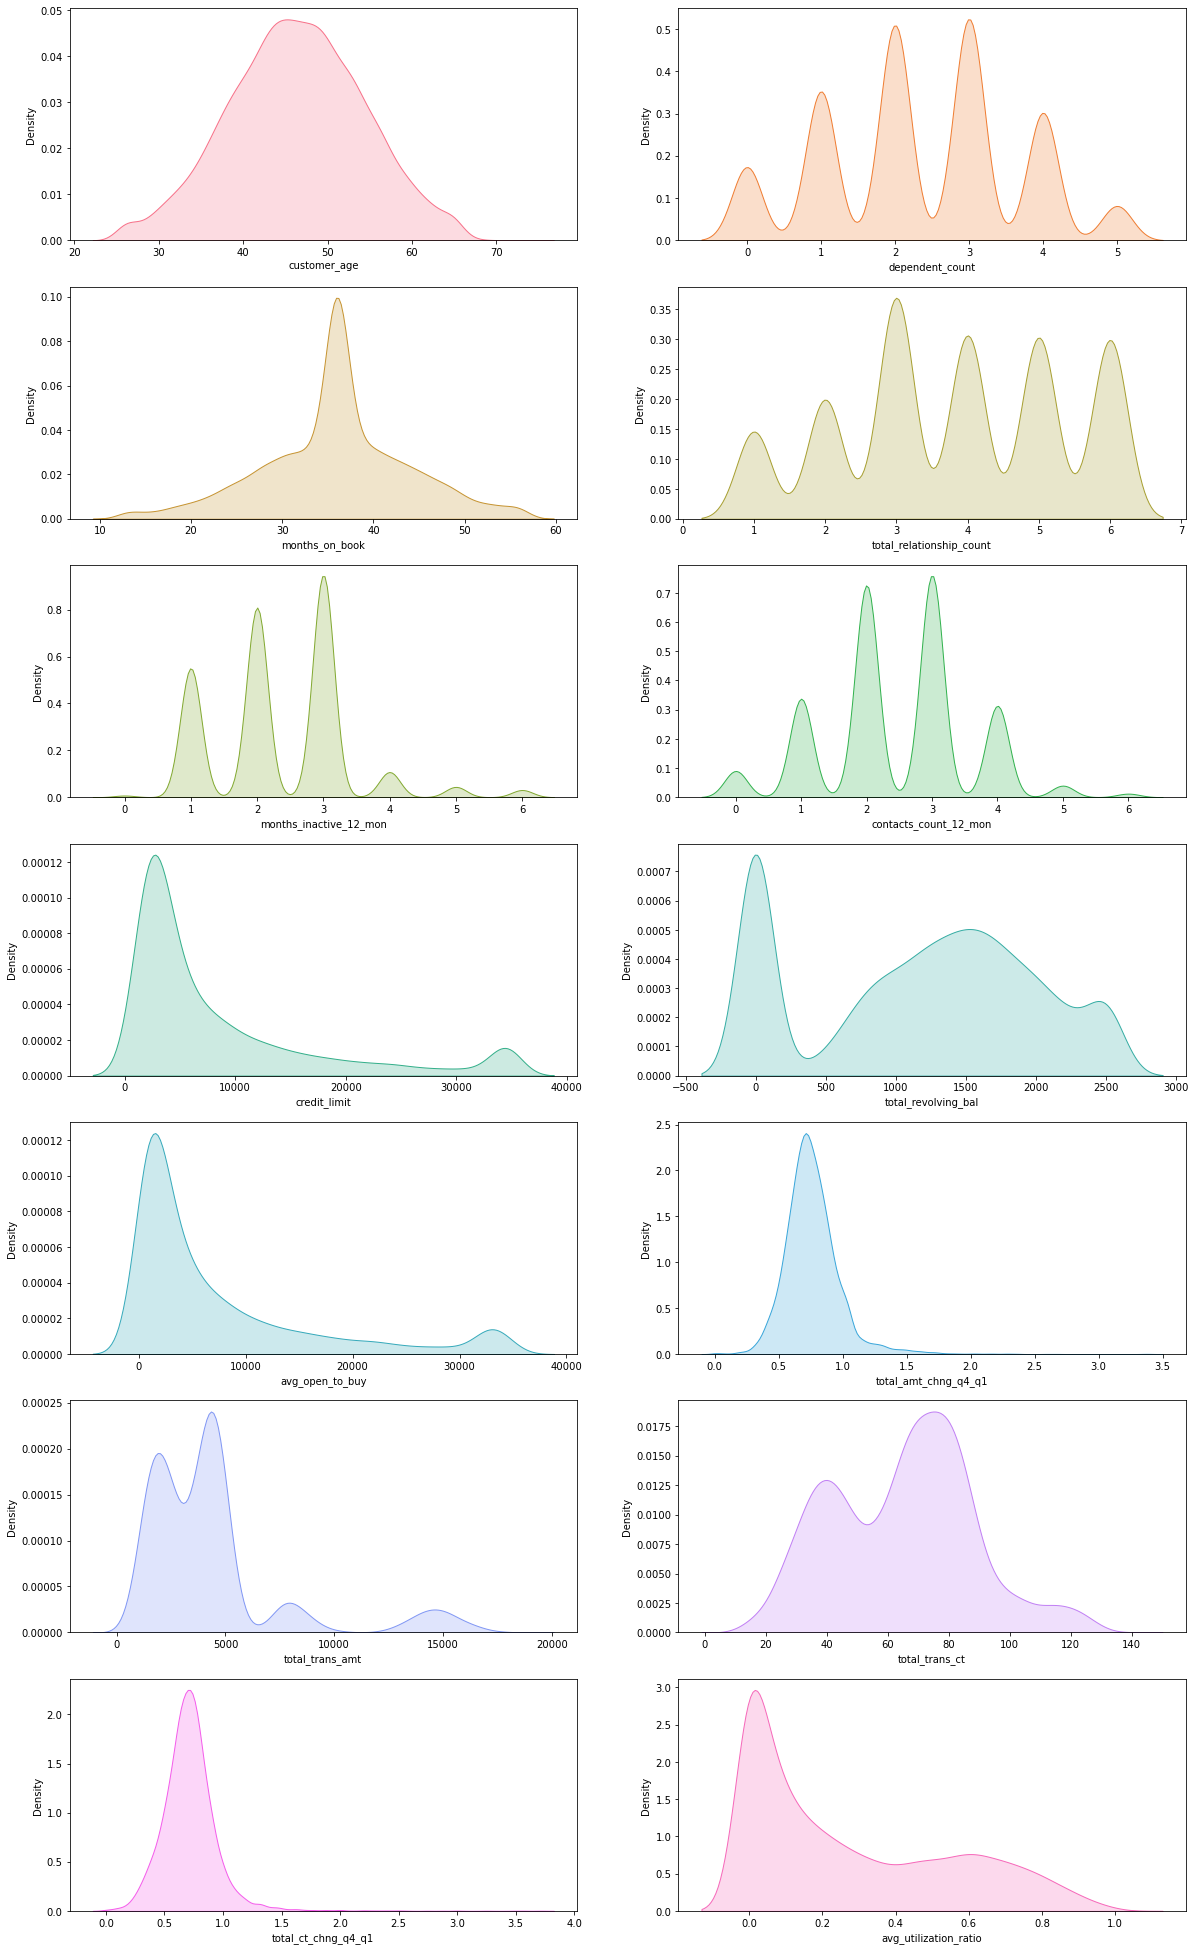

In [17]:
# Select numerical variables
bank_churn_num_cols = bank_churn_customers.select_dtypes(exclude=object).columns.to_list()

# Pick color scheme for the graphs
colors = sns.color_palette("husl", n_colors=14).as_hex()

# Visualize numerical variables
fig, ax = plt.subplots(figsize =(20, 35))

# Loop columns
for col in bank_churn_num_cols:
    i = bank_churn_num_cols.index(col)
    plt.subplot(7, 2, i+1)
    sns.kdeplot(x = col, data = bank_churn_customers, color=colors[i], fill=True)

<p>We can see, based on the graphs above (distribution of the data) that most probably we have some skewness/kurtosis which we need to handle<sup>7, 8, 9</sup></p>

In [18]:
# Check the skeweness and kurtosis of the numerical variables - save them into dataframe.
# We'll take as a basis value of skewness > 0.1
bank_churn_skew_kurt = abs(bank_churn_customers[bank_churn_num_cols].skew()).sort_values(ascending=False).to_frame().rename(columns={0: "Skew"})
bank_churn_skew_kurt["Kurtosis"] = abs(bank_churn_customers[bank_churn_num_cols].kurt()).to_frame().rename(columns={0: "Kurtosis"})
bank_churn_skew_kurt

,Skew,Kurtosis
total_ct_chng_q4_q1,2.064031,15.689293
total_trans_amt,2.041003,3.894023
total_amt_chng_q4_q1,1.732063,9.993501
credit_limit,1.666726,1.808989
avg_open_to_buy,1.661697,1.798617
avg_utilization_ratio,0.718008,0.794972
months_inactive_12_mon,0.633061,1.098523
total_relationship_count,0.162452,1.006131
total_trans_ct,0.153673,0.367163
total_revolving_bal,0.148837,1.145992


In [19]:
bank_churn_skew_kurt = bank_churn_skew_kurt.query("Skew > 0.1")

<p>Now we'll apply Box-Cox Normalization<sup>10, 11, 12</sup> to transform all the skew/kurtosis features (skew >= 0.1) into a normal distribution.</p>

In [20]:
# Here warning appear - PearsonRConstantInputWarning: An input array is constant. Probably to be hidden using warnings.filterwarnings("ignore").
# Copy the dataset in case we need to check the data before normalization.
bank_churn_customers_new = bank_churn_customers.copy()

# Apply boxcox to the copied dataframe.
for col in bank_churn_skew_kurt.index:
    bank_churn_customers_new[col] = boxcox1p(bank_churn_customers_new[col], boxcox_normmax(bank_churn_customers_new[col] + 1))

# Show the normalized data
bank_churn_customers_new

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,59.836822,5.275307,0.811746,3,2.716845,4280.426354,9.828214,0.609716,4.022447,24.061892,0.722223,0.056755
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,68.652702,6.365973,0.811746,2,2.700657,4910.374979,9.306448,0.650246,4.056733,19.727999,0.987854,0.092993
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,54.625580,4.193079,0.811746,0,2.658615,0.000000,8.468467,0.789782,4.159755,13.019834,0.842553,0.000000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,51.186470,3.120912,2.350598,1,2.656873,19592.964234,6.903160,0.624199,4.029120,13.019834,0.842553,0.386625
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,29.632434,5.275307,0.811746,0,2.675505,0.000000,8.817401,0.744414,3.922654,17.222266,0.865025,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,61.587312,3.120912,1.416280,3,2.667145,13161.907236,7.968936,0.430749,4.620830,55.493864,0.512129,0.292474
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,36.100600,4.193079,1.416280,3,2.670580,16324.253528,7.937966,0.466993,4.512655,36.123420,0.443517,0.311096
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,54.625580,5.275307,1.916278,4,2.682133,0.000000,8.966356,0.472061,4.544323,32.228567,0.497686,0.000000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,54.625580,4.193079,1.916278,3,2.680998,0.000000,8.940322,0.360891,4.504020,33.103507,0.459877,0.000000


<p>Let's check the correlation between the features in the original dataset and in the one after applied Box-Cox Normalization.</p>

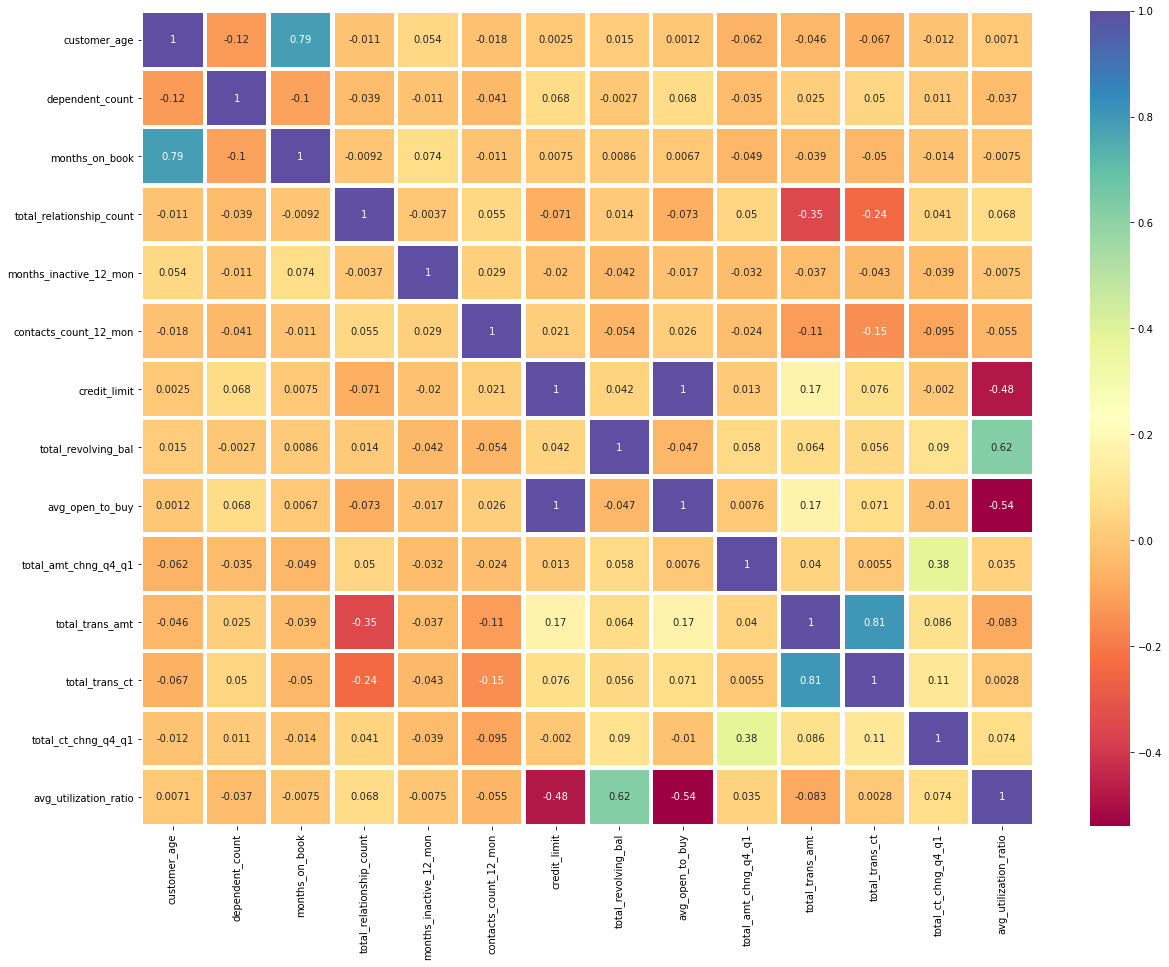

In [21]:
# Correlation heatmap between the features in original dataset.
plt.figure(figsize=(20, 15))
sns.heatmap(bank_churn_customers.corr(), annot=True, cmap="Spectral", linewidths=3.5, linecolor="white")
plt.show()

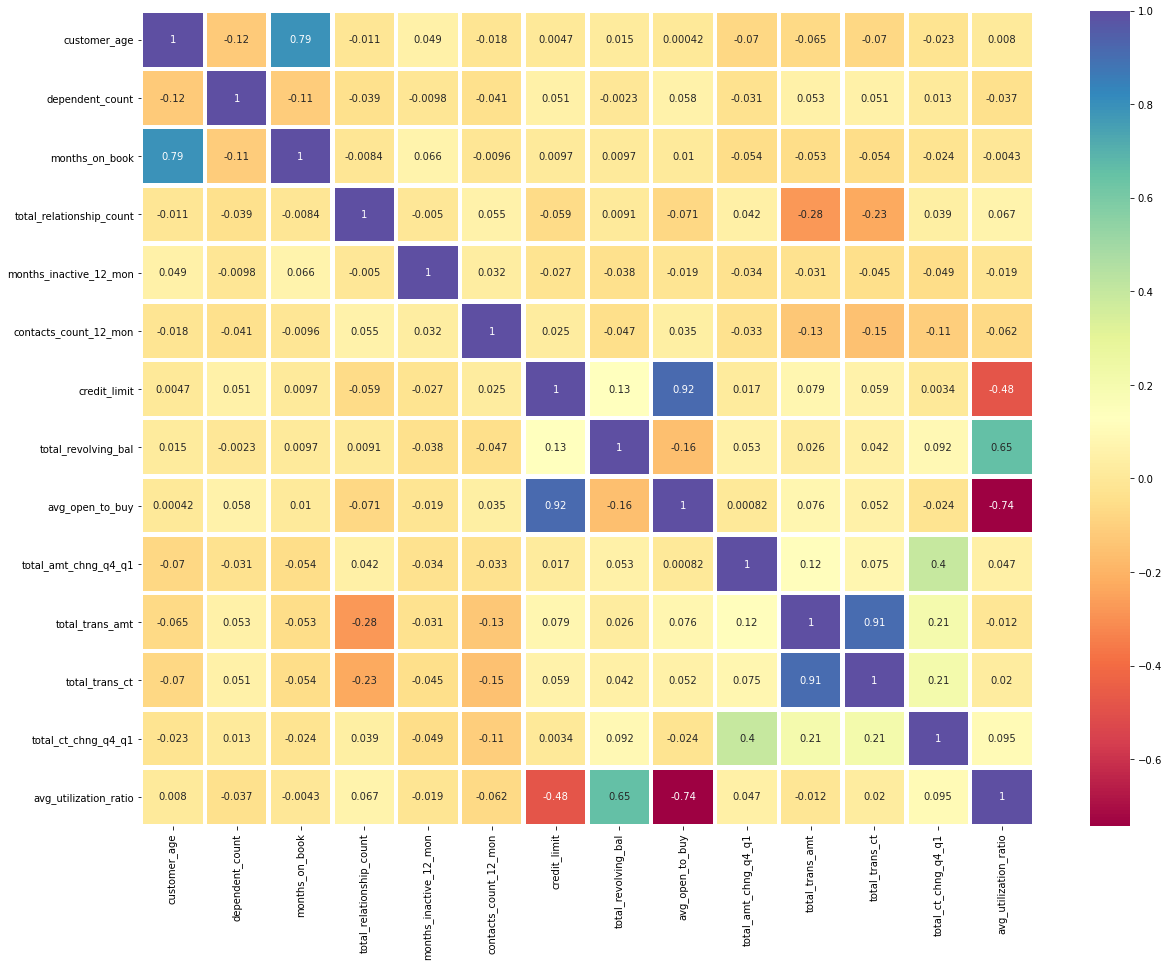

In [22]:
# Correlation heatmap between the features in normalized dataset.
plt.figure(figsize=(20, 15))
sns.heatmap(bank_churn_customers_new.corr(), annot=True, cmap="Spectral", linewidths=3.5, linecolor="white")
plt.show()

<p>We can see that the correlation is almost the same between the features. There are very small differencies which most probably will not impact the analysis. The main differencies are:
<ul>
    <li>Correlation between "Credit Limit" and "Avg Open to Buy" has changed from 1 (100%/fully correlated) to 0.92 which again means that this 2 features are very high correlated.</li>
    <li>Correlation between "Total Transaction Count" and "Total Transaction Amount" is increased from 0.81 to 0.91. Again here the increase is in a positive way which means that the correlation is very high and it's increased after normalization.</li>
    <li>For all other features the correlation ratio is increased - for positive corelation => the date become a little bit more correlated (example total_trans_ct and total_trans_amt) and for negative correlation - increase of negativity - becomes more not correlated (example avg_utilization_ratio and avg_open_to_buy).</li>
    </ul>
    
Conclusion - Normalization will not impact the correlation between the features - all highly correlated features remain higly correlated and all low (no correlated) remains low correlated.</p>

In [23]:
# Changing the attrition_flag to 0 and 1 (Hidden Input/Output)
# Changing the gender to 0 and 1
bank_churn_customers_new["attrition_flag"] = bank_churn_customers_new["attrition_flag"].map({"Existing Customer": 0, "Attrited Customer": 1})
bank_churn_customers_new["gender"] = bank_churn_customers_new["gender"].map({"M": 0, "F": 1})

# Get dummies data - make new columns from categorical data
bank_churn_customers_new = pd.get_dummies(bank_churn_customers_new, 
                                        columns=["gender", "education_level", "marital_status", 
                                                 "income_category", "card_category"],
                                        drop_first=False
                                       )
bank_churn_customers_new.head()

,attrition_flag,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,...,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
0,0,45,3,59.836822,5.275307,0.811746,3,2.716845,4280.426354,9.828214,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,68.652702,6.365973,0.811746,2,2.700657,4910.374979,9.306448,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,54.625580,4.193079,0.811746,0,2.658615,0.000000,8.468467,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,51.186470,3.120912,2.350598,1,2.656873,19592.964234,6.903160,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,29.632434,5.275307,0.811746,0,2.675505,0.000000,8.817401,...,0,0,1,0,0,0,1,0,0,0


In [24]:
# Define the attributes and target - prepare the data for modelling
bank_churn_customers_target = bank_churn_customers_new["attrition_flag"]
bank_churn_customers_attributes = bank_churn_customers_new.drop("attrition_flag", axis = 1)

In [25]:
# Check the target
bank_churn_customers_target.head()

0    0
1    0
2    0
3    0
4    0
Name: attrition_flag, dtype: int64

In [26]:
# Check the attributes
bank_churn_customers_attributes.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,...,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
0,45,3,59.836822,5.275307,0.811746,3,2.716845,4280.426354,9.828214,0.609716,...,0,0,1,0,0,0,1,0,0,0
1,49,5,68.652702,6.365973,0.811746,2,2.700657,4910.374979,9.306448,0.650246,...,0,0,0,0,1,0,1,0,0,0
2,51,3,54.625580,4.193079,0.811746,0,2.658615,0.000000,8.468467,0.789782,...,0,0,0,1,0,0,1,0,0,0
3,40,4,51.186470,3.120912,2.350598,1,2.656873,19592.964234,6.903160,0.624199,...,0,0,0,0,1,0,1,0,0,0
4,40,3,29.632434,5.275307,0.811746,0,2.675505,0.000000,8.817401,0.744414,...,0,0,1,0,0,0,1,0,0,0


In [27]:
# Scaling the attributes data with MinMaxScaler
bank_churn_customers_attributes_scaled = MinMaxScaler().fit_transform(bank_churn_customers_attributes)

# Show the scaled data as dataframe without saving it.
pd.DataFrame(bank_churn_customers_attributes_scaled, columns = bank_churn_customers_new.columns[1:]).head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,...,income_category_$120K +,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Blue,card_category_Gold,card_category_Platinum,card_category_Silver
0,0.404255,0.6,0.582156,0.796055,0.262481,0.500000,0.795967,0.218468,0.878010,0.713665,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.489362,1.0,0.702691,1.000000,0.262481,0.333333,0.683417,0.250619,0.823683,0.761105,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.531915,0.6,0.510905,0.593688,0.262481,0.000000,0.391116,0.000000,0.736431,0.924430,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.297872,0.8,0.463883,0.393203,0.760075,0.166667,0.379005,1.000000,0.573448,0.730617,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.297872,0.6,0.169185,0.796055,0.262481,0.000000,0.508545,0.000000,0.772762,0.871327,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
# Split features into testing and training datasets
# We'll set train size as 30% and random state to 42
bank_churn_customers_attributes_train, bank_churn_customers_attributes_test, \
bank_churn_customers_target_train, bank_churn_customers_target_test = \
train_test_split(bank_churn_customers_attributes_scaled,
               bank_churn_customers_target,
               test_size = 0.30,
               random_state = 0
              )

In [29]:
# Applying SMOTE to handle imbalance in target variable
sm = SMOTE(random_state = 42, sampling_strategy = 1.0)

bank_churn_customers_attributes_train, bank_churn_customers_target_train = \
sm.fit_resample(bank_churn_customers_attributes_train, bank_churn_customers_target_train)

In [30]:
# Cross validation on differnet set of algorithms.
rs = 42

kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=rs)

classifiers = [
    SVC(),
    DecisionTreeClassifier(random_state=rs),
    ExtraTreesClassifier(random_state = rs),
    RandomForestClassifier(random_state=rs),
    AdaBoostClassifier(random_state=rs),
    GradientBoostingClassifier(random_state=rs),
    GaussianNB(), # No random_state property,
    BernoulliNB(), # No random_state property,
    LogisticRegression(random_state=rs), 
    XGBClassifier(random_state=rs)
]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, bank_churn_customers_attributes_train, bank_churn_customers_target_train, 
                                      scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"Algorithm":["SVC", "DecisionTreeClassifier", "ExtraTreesClassifier","RandomForestClassifier",
                              "AdaBoostClassifier", "GradientBoostingClassifier", "GaussianNB", "BernoulliNB",
                              "LogisticRegression", "XGBClassifier"], 
                     "CV_Score_Means": cv_means, "CV_Errors": cv_std})
print(cv_df)

                    Algorithm  CV_Score_Means  CV_Errors
0                         SVC        0.917020   0.011573
1      DecisionTreeClassifier        0.942202   0.005654
2        ExtraTreesClassifier        0.976340   0.003954
3      RandomForestClassifier        0.974564   0.002830
4          AdaBoostClassifier        0.956059   0.005313
5  GradientBoostingClassifier        0.972199   0.002769
6                  GaussianNB        0.815954   0.010415
7                 BernoulliNB        0.643232   0.010297
8          LogisticRegression        0.880852   0.011416
9               XGBClassifier        0.983522   0.001848


[12:07:45] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


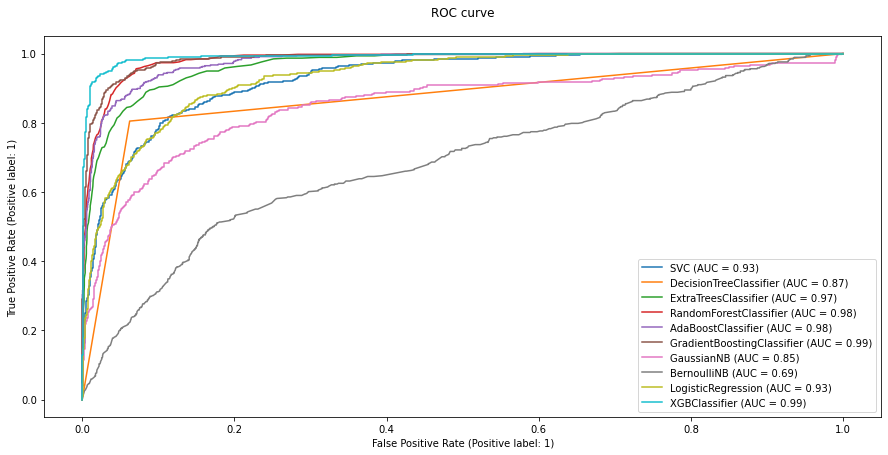

In [31]:
# Plotting ROC Curve with all classifiers.
# Here warning appear - ConvergenceWarning: lbfgs failed to converge (status=1). Probably to be hidden using warnings.filterwarnings("ignore").
fig, ax = plt.subplots(figsize=(15,7))

model_displays = {}

for model in classifiers:
    model.fit(bank_churn_customers_attributes_train, bank_churn_customers_target_train)
    name = type(model).__name__
    model_displays[type(model).__name__] = plot_roc_curve(
            model, bank_churn_customers_attributes_test, bank_churn_customers_target_test, ax=ax, name=name)

_ = ax.set_title("ROC curve", pad = 20)
plt.show()

<p>With a ROC curve, you're trying to find a good model that optimizes the trade off between the False Positive Rate (FPR) and True Positive Rate (TPR). What counts here is how much area is under the curve (Area under the Curve = AuC). The ideal curve in the left image fills in 100%, which means that you're going to be able to distinguish between negative results and positive results 100% of the time (which is almost impossible in real life). The further you go to the right, the worse the detection. The ROC curve to the far right does a worse job than chance, mixing up the negatives and positives (which means you likely have an error in your setup).  
    
Based on the results of the ROC Curve<sup>13</sup> we'll focus on results of 0.9 and above. We'll try to find the one which suits best to our prediction of churn customers. Selected models are:
<ul>
    <li>SVC</li>
    <li>ExtraTreesClassifier</li>
    <li>RandomForestClassifier</li>
    <li>AdaBoostClassifier</li>
    <li>GradientBoostingClassifier</li>
    <li>LogisticRegression</li>
    <li>XGBClassifier</li>
</ul>

For evaluating the classifiers we'll use in addition with ROC Curve - Confusion matrix<sup>14</sup>  and classification report<sup>15</sup>.

Confusion Matrixis a tool to determine the performance of classifier. It contains information about actual and predicted classifications. The below table shows confusion matrix of two-class, churned customers and non-churned customers classifier.
<ul>
<li>True Positive (TP) is the number of correct predictions that an example is positive which means positive class correctly identified as positive. Example: Given class is churned and the classifier has been correctly predicted it as churned.</li>
<li>False Negative (FN) is the number of incorrect predictions that an example is negative which means positive class incorrectly identified as negative. Example: Given class is churned however, the classifier has been incorrectly predicted it as non-churned.</li>
<li>False positive (FP) is the number of incorrect predictions that an example is positive which means negative class incorrectly identified as positive. Example: Given class is non-churned however, the classifier has been incorrectly predicted it as churned.</li>
<li>True Negative (TN) is the number of correct predictions that an example is negative which means negative class correctly identified as negative. Example: Given class is not churned and the classifier has been correctly predicted it as not negative.</li>
    </ul></p>


SVC:
                      precision    recall  f1-score   support

0: Existing Customer       0.96      0.90      0.93      2583
1: Attrited Customer       0.58      0.78      0.67       456

            accuracy                           0.88      3039
           macro avg       0.77      0.84      0.80      3039
        weighted avg       0.90      0.88      0.89      3039



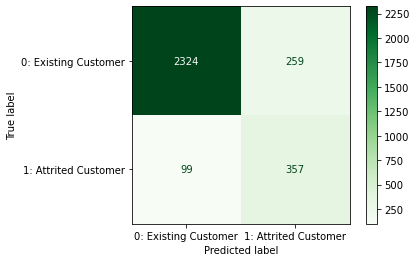


ExtraTreesClassifier:
                      precision    recall  f1-score   support

0: Existing Customer       0.95      0.98      0.96      2583
1: Attrited Customer       0.84      0.71      0.77       456

            accuracy                           0.94      3039
           macro avg       0.90      0.85      0.87      3039
        weighted avg       0.93      0.94      0.93      3039



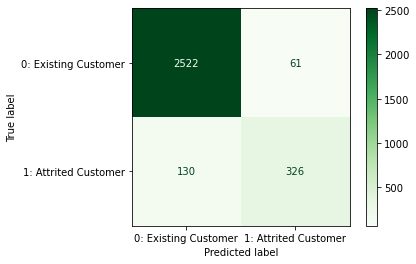


RandomForestClassifier:
                      precision    recall  f1-score   support

0: Existing Customer       0.97      0.97      0.97      2583
1: Attrited Customer       0.82      0.84      0.83       456

            accuracy                           0.95      3039
           macro avg       0.90      0.90      0.90      3039
        weighted avg       0.95      0.95      0.95      3039



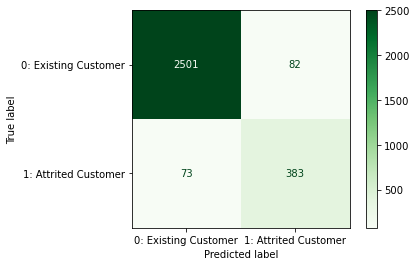


AdaBoostClassifier:
                      precision    recall  f1-score   support

0: Existing Customer       0.98      0.95      0.96      2583
1: Attrited Customer       0.75      0.87      0.81       456

            accuracy                           0.94      3039
           macro avg       0.86      0.91      0.88      3039
        weighted avg       0.94      0.94      0.94      3039



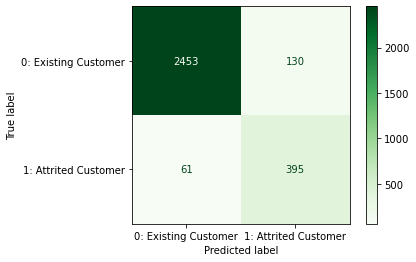


GradientBoostingClassifier:
                      precision    recall  f1-score   support

0: Existing Customer       0.98      0.97      0.97      2583
1: Attrited Customer       0.84      0.89      0.86       456

            accuracy                           0.96      3039
           macro avg       0.91      0.93      0.92      3039
        weighted avg       0.96      0.96      0.96      3039



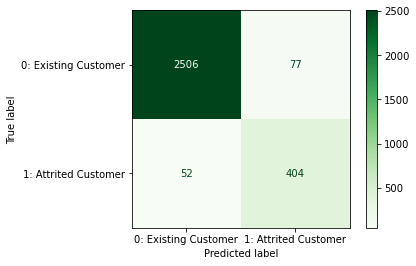


LogisticRegression:
                      precision    recall  f1-score   support

0: Existing Customer       0.97      0.87      0.91      2583
1: Attrited Customer       0.53      0.84      0.65       456

            accuracy                           0.86      3039
           macro avg       0.75      0.85      0.78      3039
        weighted avg       0.90      0.86      0.87      3039



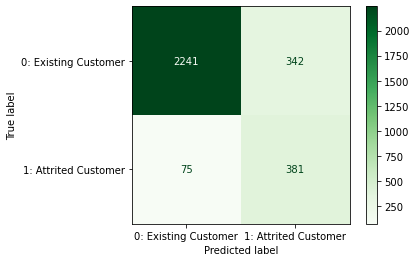


XGBClassifier:
                      precision    recall  f1-score   support

0: Existing Customer       0.98      0.99      0.99      2583
1: Attrited Customer       0.93      0.91      0.92       456

            accuracy                           0.98      3039
           macro avg       0.96      0.95      0.95      3039
        weighted avg       0.98      0.98      0.98      3039



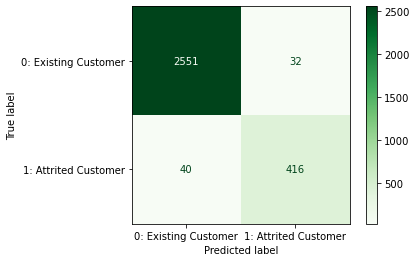

In [32]:
# Check which model will be best suitable for our modeling with classification report and plot of confusion matrix.
potential_model = ["SVC", "ExtraTreesClassifier", "RandomForestClassifier", "AdaBoostClassifier",
                   "GradientBoostingClassifier", "LogisticRegression", "XGBClassifier"]
for model in classifiers:
    name = type(model).__name__
    if name in potential_model:
        predictions =model.predict(bank_churn_customers_attributes_test)
        cm = confusion_matrix(bank_churn_customers_target_test, predictions, labels=model.classes_)
        cr = classification_report(y_true=bank_churn_customers_target_test, 
                                   y_pred=predictions,
                                   target_names=["0: Existing Customer", "1: Attrited Customer"]
                                  )
        print(f"\n{name}:\n{cr}")
        plot_confusion_matrix(model,
                      bank_churn_customers_attributes_test, bank_churn_customers_target_test,
                      cmap=plt.cm.Greens,
                      display_labels = ["0: Existing Customer", "1: Attrited Customer"])
        plt.grid(False)
        plt.show();

 <p>All our classifiers perform well on Existing Customers, however, our target is to have a good classifier for Attrited Customers. Therefore, the classification metrics that would be at most interest would be the following metrics - precision, recall and F1 from the classification report.
    
The greater values the better performance (with respect to the folowwing respective order: recall, precision and F1

In our confusion matrices above we can see:
<ul>
<li>SVC (precision = 0.58, recall = 0.78, F1 = 0.67)</li> 
<li>ExtraTreesClassifier (precision = 0.84, recall = 0.71, F1 = 0.77)</li> 
<li>RandomForestClassifier (precision = 0.82, recall = 0.84, F1 = 0.83)</li>
<li>AdaBoostClassifier (precision = 0.75, recall = 0.87, F1 = 0.81)</li> 
<li>GradientBoostingClassifier (precision = 0.84, recall = 0.89, F1 = 0.86)</li>  
<li>LogisticRegression (precision = 0.53, recall = 0.84, F1 = 0.65)</li>
<li>XGBClassifier (precision = 0.93, recall = 0.91, F1 = 0.92)</li>
</ul> 
For identifying the Customer churn, we are going to use Extreme Gradient Boosting technique (XGBoost) which is the best classifier, based on above classification report results. (precision = 0.93, recall = 0.91, F1 = 0.92) and it is consistent with the AUC metric - 0.99 in the ROC above and have the lowest Cross validatin error value - 0.001848.

XGBoost<sup>16, 17</sup> is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.</p>

In [33]:
# Set XGBClassifier parameters values for GridSearchCV
# learning_rate - Step size shrinkage used in update to prevents overfitting. 
# After each boosting step, we can directly get the weights of new features, and eta shrinks 
#     the feature weights to make the boosting process more conservative. range: [0,1]
# n_estimators - Number of gradient boosted trees. Equivalent to number of boosting rounds.
# max_depth - Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. default=6
# gamma - Minimum loss reduction required to make a further partition on a leaf node of the tree. 
#     The larger gamma is, the more conservative the algorithm will be. default=0, range: [0,∞]
# objective - Logistic regression for binary classification, output probability
# use_label_encoder - XGBClassifier uses deprecated functions of scikit-learn package. 
#     This has no impact on the performance of the model, this will just remove user warning that comes while running XGBClassifier.
# booster - Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions. default= gbtree
# eval_metric - Evaluation metrics for validation data, a default metric will be assigned according to objective 
#     (rmse for regression, and logloss for classification, mean average precision for ranking)
# User can add multiple evaluation metrics. 
#     Python users: remember to pass the metrics in as list of parameters pairs instead of map, 
#     so that latter eval_metric won’t override previous one.
params = {
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.5],
    "n_estimators": [10, 50, 70, 100, 200],
    "max_depth": [1, 3, 5],
    "gamma": [0.1, 0.6],
    "objective": ["binary:logistic"],
    "use_label_encoder": [False],
    "booster": ["gbtree", "dart"],
    "eval_metric": ["auc", "logloss"]
}

<p>Now we'll use GridSearchCV<sup>18, 19</sup> for hyper parameter tuning.</p>

In [34]:
%%time
# Assign GridSearchCV with estimator XGBoost
# n_jobs is an integer, specifying the maximum number of concurrently running workers. 
#     If 1 is given, no joblib parallelism is used at all, which is useful for debugging. 
#     If set to -1, all CPUs are used. For n_jobs below -1, (n_cpus + 1 + n_jobs) are used. 
#     For example with n_jobs=-2, all CPUs but one are used.
# cv - Determines the cross-validation splitting strategy. Possible inputs for cv are:
#     None, to use the default 5-fold cross validation,
#     integer, to specify the number of folds in a (Stratified)KFold,
#     CV splitter,
#     An iterable yielding (train, test) splits as arrays of indices.
# verbose - Controls the verbosity: the higher, the more messages.
#     >1 : the computation time for each fold and parameter candidate is displayed;
#     >2 : the score is also displayed;
#     >3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
grid_search = GridSearchCV(estimator = XGBClassifier(random_state=rs), param_grid = params, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(bank_churn_customers_attributes_train, bank_churn_customers_target_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
Wall time: 48min 23s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'booste

In [35]:
# Best parameters and best score.
print("Best params are: ", grid_search.best_params_)
print("Best estimator score: ", grid_search.best_score_)

Best params are:  {'booster': 'gbtree', 'eval_metric': 'auc', 'gamma': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'objective': 'binary:logistic', 'use_label_encoder': False}
Best estimator score:  0.9589334759295965


In [36]:
# Check the classification report.
print(classification_report(
    bank_churn_customers_target_test,
    grid_search.best_estimator_.predict(bank_churn_customers_attributes_test),
    target_names=["0: Existing Customer", "1: Attrited Customer"]
))

                      precision    recall  f1-score   support

0: Existing Customer       0.98      0.97      0.97      2583
1: Attrited Customer       0.83      0.88      0.85       456

            accuracy                           0.95      3039
           macro avg       0.90      0.93      0.91      3039
        weighted avg       0.96      0.95      0.96      3039



In [37]:
# Show GridSearch results.
grid_search.cv_results_

{'mean_fit_time': array([ 0.18955175,  0.77888711,  1.05806557,  1.46716674,  2.69013913,
         0.38178333,  1.54612303,  2.25771936,  3.14554866,  6.0505662 ,
         0.64230156,  2.97031458,  4.02804716,  5.66145539, 11.82962275,
         0.1449194 ,  0.61165214,  0.80887373,  1.26161623,  2.46360159,
         0.31415645,  1.48482394,  2.1614391 ,  2.98863681,  5.84268554,
         0.69027464,  2.89402374,  3.95242429,  5.49688172, 11.65039102,
         0.14558236,  0.58566713,  0.83052937,  1.21797546,  2.45660448,
         0.32281566,  1.50048153,  2.18542616,  3.21184452,  6.17782903,
         0.76823076,  2.9949669 ,  4.08135096,  5.88166261, 12.7910769 ,
         0.15324601,  0.64296826,  0.86917329,  1.25029079,  2.60185631,
         0.35546454,  1.52646565,  2.04950333,  3.34843381,  6.99103451,
         0.70759853,  3.37308574,  5.10876926,  8.14704482, 15.17505852,
         0.21854266,  0.95179296,  1.41353162,  1.8766017 ,  3.62627586,
         0.44474745,  2.09581017, 

In [38]:
# Train The Model With Best Hyper Parameters.
xgb_model = XGBClassifier(random_state=42, booster = "gbtree", eval_metric = "auc", gamma = 0.6,
                              learning_rate = 0.1, max_depth = 5, n_estimators = 50, objective = "binary:logistic",
                              use_label_encoder = False)
xgb_model.fit(bank_churn_customers_attributes_train, bank_churn_customers_target_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0.6, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

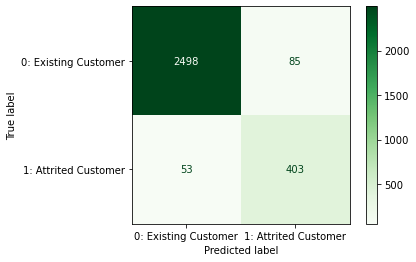

In [39]:
# Plot confusion matrix of trained model.
plot_confusion_matrix(xgb_model,
                      bank_churn_customers_attributes_test, 
                      bank_churn_customers_target_test,
                      cmap=plt.cm.Greens,
                      display_labels = ["0: Existing Customer", "1: Attrited Customer"])
plt.grid(False)
plt.show();

In [40]:
# Check the classification report of trained model.
print(classification_report(bank_churn_customers_target_test, xgb_model.predict(bank_churn_customers_attributes_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2583
           1       0.83      0.88      0.85       456

    accuracy                           0.95      3039
   macro avg       0.90      0.93      0.91      3039
weighted avg       0.96      0.95      0.96      3039



In [41]:
# Check separately the accuracy score which on our case is same as the accuracy in the classification report.
print(accuracy_score(bank_churn_customers_target_test, xgb_model.predict(bank_churn_customers_attributes_test)))

0.9545903257650543


In [42]:
# Show important features.
feature = pd.Series(xgb_model.feature_importances_, 
                    index = pd.DataFrame(bank_churn_customers_attributes_scaled, columns = bank_churn_customers_new.columns[1:]).columns).sort_values(ascending = False)
print(feature)


total_trans_ct                    0.321005
total_revolving_bal               0.124865
total_relationship_count          0.107508
months_inactive_12_mon            0.073323
total_trans_amt                   0.060812
total_ct_chng_q4_q1               0.051886
total_amt_chng_q4_q1              0.035994
contacts_count_12_mon             0.034355
dependent_count                   0.034101
customer_age                      0.030387
gender_0                          0.019906
months_on_book                    0.018926
income_category_$60K - $80K       0.018542
avg_open_to_buy                   0.015967
credit_limit                      0.013610
avg_utilization_ratio             0.006707
marital_status_Married            0.006589
education_level_Post-Graduate     0.005330
income_category_$80K - $120K      0.005016
card_category_Gold                0.004030
card_category_Blue                0.003904
education_level_Graduate          0.003013
marital_status_Single             0.002895
education_l

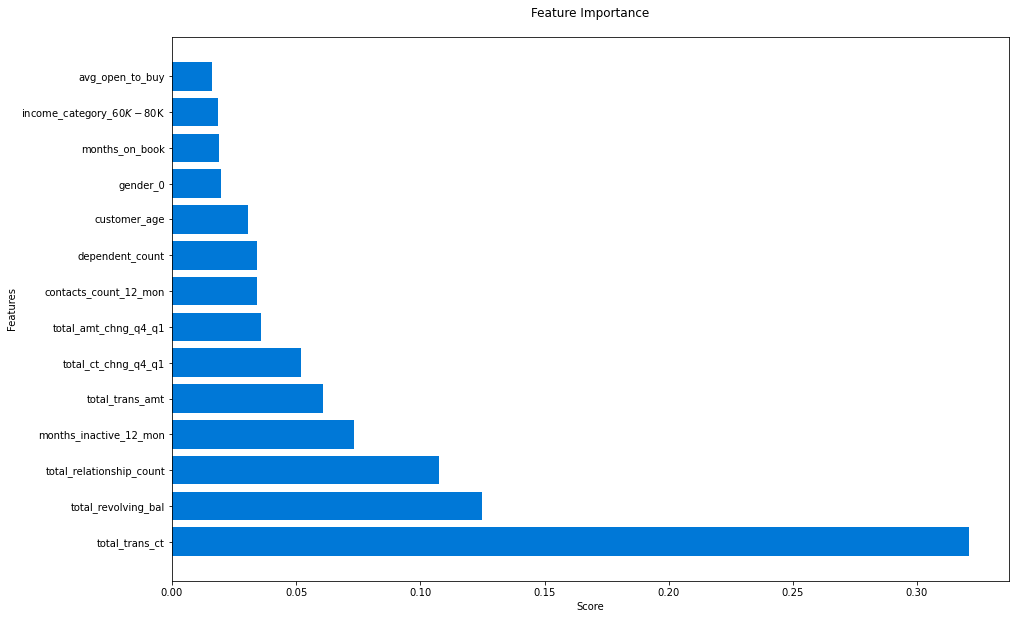

In [43]:
# Plotting the important features - we plot only 14 of them, because other features have very low value - less than 0.01.
plt.figure(figsize = (15, 10))
plt.barh(feature.index[:14], feature[:14], color = "#0078d7")

plt.title("Feature Importance", pad = 20)
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()

<h3>Conclusions</h3>
<p><ul>
    <li>There are 16.1% of customers who have churned.</li>
    <li>The proportion of gender count is almost equally distributed (52.9% females and 47.3% males) compare to proportion of existing and attributed customer count (83.9% and 16.1%) which is highly imbalanced.</li>
    <li>The proportion of attrited customers by gender - there are 2.3% more females than males who have churned.</li>
    <li>Customers who have churned are highly educated - A high proportion of education level of attrited customer is Graduate level (4.8%), followed by High School level (3%). Education level of the customers are highly clustered in Graduate (31%) and High School (20%).</li>
    <li>A high proportion of marital status of customers who have churned is Married (7.00%), followed by Single (6.59%) - Marital stuats of the customers are highly clustered in Married (39%) and Single (32%).</li>
    <li>As we can see from the proportion of income category of attrited customer, it is highly concentrated around Less than 40K	(6% attried customers and 35% of total customers), followed by 40𝐾− 60K (attried ~3% and ~18% of total customers) and 80𝐾− 120K (attried ~2% and ~15% of total customers). We can assume that customers with higher income doesn't likely to leave their credit card services than middle to low income customers.</li>
<li>We can see that the 14% of Blue card type holder are attried customers. This is expected, because this customers are 93% of the total customers.</li>
</ul>
    
The Bank can take enough insights from the Exploratory Data Analysis performed to understand which kind of Customers are more likely to leave. They can use this XGBoost Classifier model to safely predict whether a customer will leave or not. By looking at the feature importance, the Bank can mitigate further churn by applying the necessary remedial actions.

Usually this actions are - detailed analysis of customer credit card transactions, product deactivation and/or new sales of credit cards, analysis why particular customers leaving (different reasons - a corporate client decide to change the servicing bank, because there are better conditions at a competitor bank and moved all his employess, individual persons leaves the bank, because of the increased taxes for using services over the counter, etc). There are few important things which could be included - we all know thatt sometimes the banks sold CC as an extra mandatory product with Housing and Personal Loans, which means that most probably after some period this will lead to customer churn in term of Credit Cards Customers. Also based on the analysis the mass of the bank's  customers are with low incomes (less than 40K) and uses standard CC (blue card category) which means that usually this customers are let's say very "fluid" and they for example often change jobs and often when changing a job the servicing bank is also changed if the new company requires it, etc.</p>

<h3>Resources</h3>

<ol>
    <li><a href="https://en.wikipedia.org/wiki/Bank#Definition">Bank Definition - Wikipedia</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Credit_card">Credit Card Definition - Wikipedia</a></li>
    <li><a href="https://www.tigeranalytics.com/blog/addressing-customer-churn-in-banking/">Customer Churn - Explanation</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Customer_attrition">Customer Churn - Wikipedia</a></li>
    <li><a href="https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/">SMOTE - ML Mastery</a></li>
    <li><a href="https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html">Crosstab Documentation</a></li>
    <li><a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm">Skewness and Kurtosis - ITL</a></li>
    <li><a href="https://www.investopedia.com/terms/k/kurtosis.asp">Skewness - Investopedia</a></li>
    <li><a href="https://www.investopedia.com/terms/s/skewness.asp">Kurtosis - Investopedia</a></li>
    <li><a href="https://www.itl.nist.gov/div898/handbook/eda/section3/boxcoxno.htm">Box-Cox - ITL</a></li>
    <li><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html">Scipy Stats Box-Cox Documentation</a></li>
    <li><a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html#scipy.special.boxcox1p">Scipy Special Boxcox1p Documentation</a></li>
    <li><a href="https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc">ROC Curve Documentation</a></li>
    <li><a href="https://machinelearningmastery.com/confusion-matrix-machine-learning/">Confusion Matrix - ML Mastery</a></li>
    <li><a href="https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397">Classification Report - Medium</a></li>
    <li><a href="https://xgboost.readthedocs.io/en/latest/">XGBoost Documentation</a></li>
    <li><a href="https://xgboost.readthedocs.io/en/latest/parameter.html">XGBoost Parameters Documentation</a></li>
    <li><a href="https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee">GridSearchCV - TowarsDataScience</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV Documentation</a></li>
    <li><a href="https://www.kaggle.com/sonalisingh1411/customer-churn-eda-top-5-models-comparion-95">Kaggle Customer Churn 1</a></li>
    <li><a href="https://www.kaggle.com/miguelfzzz/customer-churn-smote-pca-clusters-prediction">Kaggle Customer Churn 2</a></li>
    <li><a href="https://www.kaggle.com/vivek468/will-the-customer-churn">Kaggle Customer Churn 3</a></li>
    <li><a href="https://www.kaggle.com/kauvinlucas/xgboost-imblearn-pipeline-for-classification">Kaggle Customer Churn 4</a></li>
    <li><a href="https://www.kaggle.com/chetbounl/data-exploration-model-evaluation-on-bankchurners">Kaggle Customer Churn 5</a></li>
</ol>